# **Decision Tree**

Decision Tree temelinde **split** (bölme) işlemi vardır.

Decision Tree x1 ve x2 adındaki featureları split ile gruplara ayrılarak model oluşturulur. Oluşturulan bu model üzerinden prediction yapılır.

Machine learning'de splitlere ayırırken **information entropy** kullanılır.

Splitler sonucu oluşan bölümlere **terminal leaf** denir.

Prediction yapılırken, predict edilecek değere (y) bakılır, bu y değerinin hangi gruba ait olduğu bulunur ve o grubun ortalama y değeri verilir.

Decision Tree belirli aralıklar için hep aynı sonucu üreteceğinden ne kadar bölüm olursa modelin hassasiyeti o kadar artar. 

**Decision Tree Regression**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Kullanıcak data tribünlerdeki koltukların seviyeleri ve fiyatlarından oluşmaktadır.

Koltuk seviyeleri x feature'ını, koltuk fiyatları y label'ını oluşturmaktadır.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data/decision+tree+regression+dataset.csv", sep=";", header=None)
#datada sütunların adları olmadığından header=None kullanılmazsa ilk satırı sütun adları olarak alır.

In [ ]:
df

,0,1
0,1,100
1,2,80
2,3,70
3,4,60
4,5,50
5,6,40
6,7,30
7,8,20
8,9,10
9,10,5


Dataya bakıldığında tribündeki en iyi yer 1. sıra ve fiyatı 100 lira, 10. seviye en kötü yer fiyatı 5 liradır.

x ekseni seviyeler, y ekseni fiyatlar olacaktır.

Bu datada tek bir x feature'ı vardır. Bu yüzden oluşturulacak model 2 boyutlu olacaktır.

In [ ]:
x = df.iloc[:,0].values.reshape(-1,1) 
y = df.iloc[:,1].values.reshape(-1,1)#values methodu ile pandas series array'e çevrilip, reshape methodu ile 1 sütundan oluştuğu sklearn'e bildirilir.

In [ ]:
#decision tree regression model
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=1) #DecisionTreeRegressor modeli tree_reg adlı variable'a eşitlenir.
tree_reg.fit(x,y)                                 #x ve y değerleri kullanılarak model fit edilir.

DecisionTreeRegressor(random_state=1)

In [ ]:
#prediction
tree_reg.predict([[6]]) #oluşturulan modele göre 6 nolu seviyenin fiyatı 40 lira olarak tahmin edilmiştir.
                        #dataframe'e bakıldığında da aynı sonuç görülür.
                        #buradan modelin doğru tahmin yaptığı anlaşılır.

array([40.])

In [ ]:
#prediction
tree_reg.predict([[5.5]]) #5.5 değeri ortalama 50 liraya denk gelir.

array([50.])

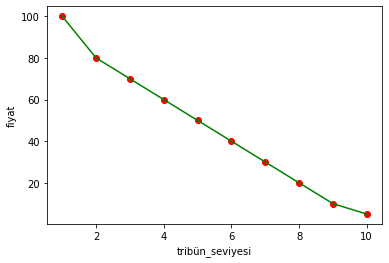

In [ ]:
y_head = tree_reg.predict(x) #x değerlerine karşılık gelen y değerleri predict edilir ve bu yapılan prediction'ın görselleştirmesi yapılır.
plt.scatter(x,y,color="red")
plt.plot(x,y_head,color="green")
plt.xlabel("tribün_seviyesi")
plt.ylabel("fiyat")
plt.show()

Bu plotta sadece verideki değerler predict edildi. Ancak herhangi bir leaf'teki tüm x değerlerinin sonucu tek bir y değerini vermektedir. Bu yüzden belirli aralıklarla düz bir çizginin oluşması lazımdır. Böylelikle daha büyük bir aralıkta prediction yapılmış olur.

In [ ]:
x_ = np.arange(min(x),max(x),0.01).reshape(-1,1)  
#x değerleri 1-10 arasındadır.
#plotta bir leaf'teki tüm x değerlerinin aynı sonucu vermesi için minimum x değerinden maximum x değerine kadar 0.01 aralıklar ile sayılar üretilir.

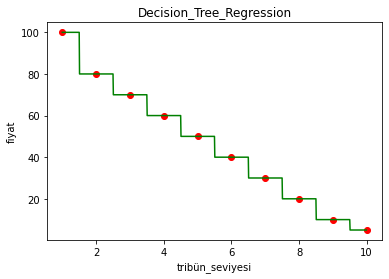

In [ ]:
#visualization
y_head = tree_reg.predict(x_)  #x değerlerine karşılık gelen y değerleri predict edilir ve bu yapılan prediction'ın görselleştirmesi yapılır.
plt.scatter(x,y,color="red")
plt.plot(x_,y_head,color="green")
plt.xlabel("tribün_seviyesi")
plt.ylabel("fiyat")
plt.title("Decision_Tree_Regression")
plt.show()

Plot incelendiğinde;

1–1,5 (leaf)

1,5–2,5 (leaf)

2,5–3,5 (leaf)...

Her biri tree'deki ayrı bir yaprağı temsil etmektedir ve bu aralıklarda tahmin edilen y değerleri aynı sonucu vermektedir.

Grafikte ani geçişlerin olduğu yerler split işlemidir.

**Decision Tree Classification**

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/data/data.csv")

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Data kanserin iyi huylu mu, kötü huylu mu olduğunu gösterir.

Diagnosis sütununda bulunan 'M' harfi malignant kötü huylu demektir.

'B' harfi benign iyi huylu tümör demektir.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Datada 569 sample bulunmaktadır.

33 sütun bulunmakta, bu sütunların 31 tanesi float değer, 1 tanesi integer değer, 1 tanesi de string değer bulundurmaktadır.

'Unnamed: 32' sütunundaki değerlerin hepsinin missing value olduğu görülür.

Model oluşturulurken 'id' ve 'Unnamed: 32' sütunları sınıflandırmada bir etkisi olmayacağından kullanılmayacaktır.

In [ ]:
data.drop(["Unnamed: 32","id"],axis=1, inplace=True)
#axis=1 olduğunda sütun drop edilir.
#inplace=True olduğunda yapılan değişiklik dataya kaydedilir.

İyi huylu ve kötü huylu tümörün görselleştirilmesi için birbirinden ayrılması gerekir.

In [ ]:
M = data[data.diagnosis=="M"]
B = data[data.diagnosis=="B"]

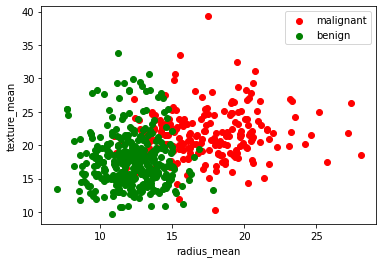

In [ ]:
plt.scatter(M.radius_mean,M.texture_mean,color="red",label="malignant") 
plt.scatter(B.radius_mean,B.texture_mean,color="green",label="benign")
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()

texture_mean ve radius_mean kullanılarak classify yapılacaktır.

In [ ]:
data.diagnosis = [1 if each=="M" else 0 for each in data.diagnosis] 
#diagnosis sütunundaki veriler string olduğundan sınıflandırma yapılırken karşılaştırma yapılamaz.
#bu yüzden kötü huylu tümör '1'e , iyi huylu tümör '0'a dönüştürülür.

y = data.diagnosis.values #pandas series values methodu ile numpy array'e çevrilir.
x_data = data.drop(["diagnosis"],axis=1) #diagnosis dışındakiler featurelardır.

In [ ]:
#normalization
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data))

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)
#random_state parametresiyle data train ve test olarak bölünürken kod her çalıştırıldığında aynı randomlıkta bölünür.
#bu parametre kullanılmazsa data her seferinde farklı yerlerden train ve test olarak ayrılacaktır.

In [ ]:
#decision tree classification model
from sklearn.tree import DecisionTreeClassifier
tree_classification = DecisionTreeClassifier(random_state=1)
tree_classification.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

decision tree'de splitlere ayırma işlemi random bir şekilde yapıldığından random_state parametresi kullanılır.

In [ ]:
#prediction
y_head = tree_classification.predict(x_test)

In [ ]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_head)
print("Accuracy of decision tree classification: {}".format(accuracy))

Accuracy of decision tree classification: 0.9298245614035088


Decision Tree Classification algoritmasıyla yapılan predictionların %92'si doğrudur.

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_head)

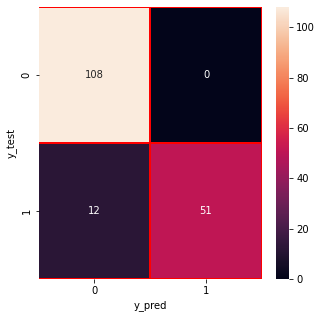

In [ ]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm,annot=True,fmt= '.0f',linewidths=0.5,linecolor="red",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()

0-> iyi huylu tümör

1 -> köyü huylu tümör

**Confusion Matrix**

**TN** **FP**

**FN** **TP** 

Confusion matrix'e bakarak;
iyi huylu tümörde 108 sample'ın hepsinin doğru tahmin edildiği, gerçekte iyi huylu tümör olup kötü huylu tümör olarak yapılan yanlış tahminin olmadığı,

kötü huylu tümörde 63 sample'ın 51'inin doğru tahmin edildiği, 12 sample'ın gerçekte kötü huylu tümör olup iyi huylu tümör olarak yanlış tahmin edildiği görülür.